In [1]:
'''
SVM with PCA 
Test Accuracy using a Linear kernel
Precision: 0.750392464678179 
Recall: 0.9735234215885947 
Fscore: 0.8475177304964541
Test Accuracy(c=0.0001): 0.7353846153846154

Logistic with PCA 
Accuracy on test data = 0.754615
Precision: 0.7551963048498845 
Recall: 0.9989816700610998 
Fscore: 0.8601490574309514
c = 0.0001

Logistic without pca 
Accuracy on test data (c=100): 0.9807692307692307
Fscore on test data (c=100): 0.9871860584315736
Recall on test data (c=100): 0.9876923076923076
Precision on test data (c=100): 0.9866803278688525

SVM without PCA
Linear 
Test Accuracy(c=10/c=100): 0.9838461538461538
Precision: 0.9917525773195877 
Recall: 0.9866666666666667 
Fscore: 0.9892030848329049
'''

'\nSVM with PCA \nTest Accuracy using a Linear kernel\nPrecision: 0.750392464678179 \nRecall: 0.9735234215885947 \nFscore: 0.8475177304964541\nTest Accuracy(c=0.0001): 0.7353846153846154\n\nLogistic with PCA \nAccuracy on test data = 0.754615\nPrecision: 0.7551963048498845 \nRecall: 0.9989816700610998 \nFscore: 0.8601490574309514\nc = 0.0001\n\nLogistic without pca \nAccuracy on test data (c=100): 0.9807692307692307\nFscore on test data (c=100): 0.9871860584315736\nRecall on test data (c=100): 0.9876923076923076\nPrecision on test data (c=100): 0.9866803278688525\n\nSVM without PCA\nLinear \nTest Accuracy(c=10/c=100): 0.9838461538461538\nPrecision: 0.9917525773195877 \nRecall: 0.9866666666666667 \nFscore: 0.9892030848329049\n'

In [2]:
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
import math


import matplotlib.pyplot as plt
%matplotlib inline

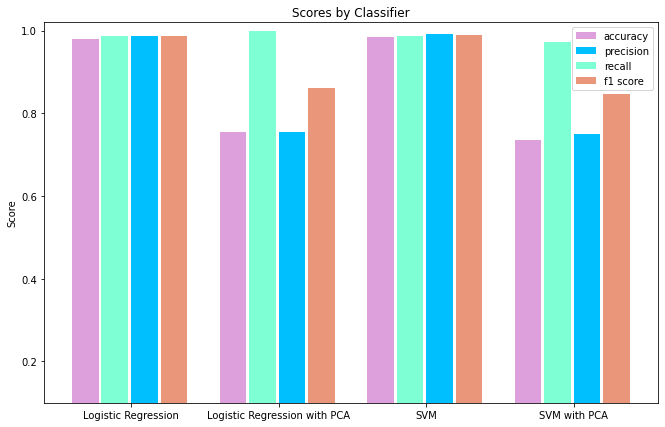

In [6]:
#Graphing 

#Logistic / Pca Log/ SVM / SVMPCA
acc = [0.9807692307692307, 0.754615, 0.9838461538461538, 0.7353846153846154]
precision = [0.9866803278688525, 0.7551963048498845, 0.9917525773195877, 0.750392464678179]
f1score = [0.9871860584315736, 0.8601490574309514, 0.9892030848329049, 0.8475177304964541]
recall = [0.9876923076923076, 0.9989816700610998, 0.9866666666666667, 0.9735234215885947]


x = np.arange(4)

fig, ax = plt.subplots(figsize=(11,7))
ax.bar(x-0.4, acc, width=0.18, align='edge',label='accuracy', color = 'plum')
ax.bar(x-0, precision, width=0.18, align='edge',label='precision', color = 'deepskyblue')
ax.bar(x-0.2, recall, width=0.18, align='edge',label='recall', color = 'aquamarine')
ax.bar(x+0.2, f1score, width=0.18, align='edge',label='f1 score', color = 'darksalmon')

ax.set_ylabel('Score')
ax.set_ylim([0.1, 1.02])
ax.set_title('Scores by Classifier')
ax.set_xticks(x)
ax.set_xticklabels(('Logistic Regression', 'Logistic Regression with PCA', 'SVM', 'SVM with PCA'))
ax.legend()


Confusion matrix, without normalization
[[304   8]
 [  6 982]]
Normalized confusion matrix
[[0.97 0.03]
 [0.01 0.99]]


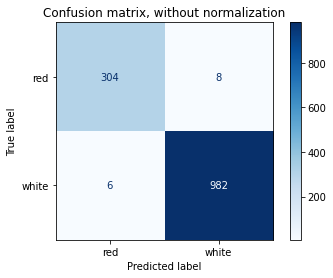

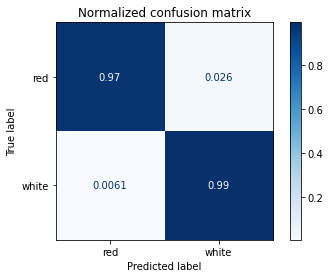

In [4]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Confusion Matrix using SVM classifier
df = pd.read_csv('winequality-combined.csv')
df1 = df.dropna()
df2 = df1.values
X = df1[['fixed acidity','volatile acidity','citric acid',
'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']].values
y = df2[:, 12]
class_names = ['red','white']
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)
classifier = svm.SVC(kernel='linear', C=0.01).fit(x_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()



Confusion matrix, without normalization
[[301  11]
 [  7 981]]
Normalized confusion matrix
[[0.96 0.04]
 [0.01 0.99]]


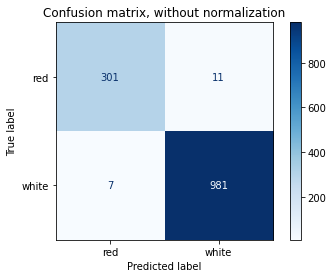

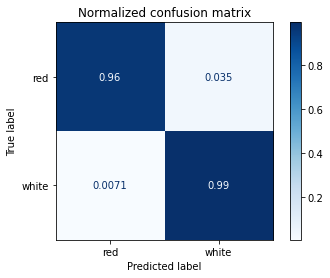

In [5]:
# Confusion Matrix using logistic regression classifier
df = pd.read_csv('winequality-combined.csv')
df1 = df.dropna()
df2 = df1.values
X = df1[['fixed acidity','volatile acidity','citric acid',
'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']].values
y = df2[:, 12]
class_names = ['red','white']
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)
classifier = linear_model.LogisticRegression(C=10**8).fit(x_train,y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()